In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8ff5a7b9b54f6a75cd2763a4c76693a


In [8]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8ff5a7b9b54f6a75cd2763a4c76693a&q=Boston


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | at-bashi
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | antalaha
Processing Record 8 of Set 1 | shimoda
Processing Record 9 of Set 1 | sande
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | grand gaube
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | vanderhoof
Processing Record 22 of Set 1 | tasiilaq
Processing Recor

Processing Record 34 of Set 4 | urengoy
Processing Record 35 of Set 4 | kharan
Processing Record 36 of Set 4 | ancud
Processing Record 37 of Set 4 | towson
Processing Record 38 of Set 4 | abu samrah
Processing Record 39 of Set 4 | saint-pierre
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | brechin
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | oktyabrskiy
Processing Record 44 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | richards bay
Processing Record 50 of Set 4 | arandis
Processing Record 1 of Set 5 | dalbandin
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | egvekinot
Processing Record 4 of Set 5 | lumsden
Processing Record 5 of Set 5 | nizhniy kuranakh
Processing Record 6 of Set 5 | deputatskiy
Proc

Processing Record 23 of Set 8 | lamu
Processing Record 24 of Set 8 | pangai
Processing Record 25 of Set 8 | zunyi
Processing Record 26 of Set 8 | ahipara
Processing Record 27 of Set 8 | san quintin
Processing Record 28 of Set 8 | lucapa
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | harbour breton
Processing Record 31 of Set 8 | pavda
City not found. Skipping...
Processing Record 32 of Set 8 | tateyama
Processing Record 33 of Set 8 | amuntai
Processing Record 34 of Set 8 | santa maria
Processing Record 35 of Set 8 | fiumicino
Processing Record 36 of Set 8 | boa vista
Processing Record 37 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 38 of Set 8 | haibowan
City not found. Skipping...
Processing Record 39 of Set 8 | lasa
Processing Record 40 of Set 8 | gatesville
Processing Record 41 of Set 8 | verkhoturye
Processing Record 42 of Set 8 | tomatlan
Processing Record 43 of Set 8 | cabo san lucas
Processing Record 44 of Set 8 | sukhovolya
Proces

Processing Record 11 of Set 12 | taiyuan
Processing Record 12 of Set 12 | shellbrook
Processing Record 13 of Set 12 | tucuma
Processing Record 14 of Set 12 | ubauro
Processing Record 15 of Set 12 | nanhai
Processing Record 16 of Set 12 | beloha
Processing Record 17 of Set 12 | kupang
Processing Record 18 of Set 12 | bandarbeyla
Processing Record 19 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 20 of Set 12 | christchurch
Processing Record 21 of Set 12 | kjollefjord
Processing Record 22 of Set 12 | birjand
Processing Record 23 of Set 12 | yarada
Processing Record 24 of Set 12 | santa cruz
Processing Record 25 of Set 12 | englehart
Processing Record 26 of Set 12 | tuy hoa
Processing Record 27 of Set 12 | kailua
Processing Record 28 of Set 12 | vasvar
Processing Record 29 of Set 12 | naftah
City not found. Skipping...
Processing Record 30 of Set 12 | stepnyak
Processing Record 31 of Set 12 | luau
Processing Record 32 of Set 12 | broome
Processing Record 33 of Set 12 | 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-21.77,78,99,7.18,GL,2022-02-09 23:20:49
1,At-Bashi,41.1702,75.8106,0.73,85,89,2.42,KG,2022-02-09 23:20:49
2,Arraial Do Cabo,-22.9661,-42.0278,69.93,89,100,4.32,BR,2022-02-09 23:20:08
3,Cape Town,-33.9258,18.4232,69.89,81,75,3.44,ZA,2022-02-09 23:20:50
4,Ushuaia,-54.8000,-68.3000,49.66,46,75,19.57,AR,2022-02-09 23:20:50
5,Antalaha,-14.9003,50.2788,75.20,93,81,3.98,MG,2022-02-09 23:20:51
6,Shimoda,34.6667,138.9500,41.36,95,100,18.97,JP,2022-02-09 23:20:51
7,Sande,53.5049,8.0142,46.00,95,100,7.07,DE,2022-02-09 23:20:52
8,Bethel,41.3712,-73.4140,38.98,65,17,5.08,US,2022-02-09 23:17:43
9,Salalah,17.0151,54.0924,66.29,22,0,9.22,OM,2022-02-09 23:20:53


In [12]:
city_data_df = city_data_df [['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
print(city_data_df)

                City Country                 Date      Lat       Lng  \
0            Qaanaaq      GL  2022-02-09 23:20:49  77.4840  -69.3632   
1           At-Bashi      KG  2022-02-09 23:20:49  41.1702   75.8106   
2    Arraial Do Cabo      BR  2022-02-09 23:20:08 -22.9661  -42.0278   
3          Cape Town      ZA  2022-02-09 23:20:50 -33.9258   18.4232   
4            Ushuaia      AR  2022-02-09 23:20:50 -54.8000  -68.3000   
..               ...     ...                  ...      ...       ...   
559        Kysyl-Syr      RU  2022-02-09 23:37:36  63.8986  122.7617   
560            Khash      IR  2022-02-09 23:37:37  28.2211   61.2158   
561         Hokitika      NZ  2022-02-09 23:37:38 -42.7167  170.9667   
562          Umm Bab      QA  2022-02-09 23:37:38  25.2142   50.8072   
563        Pingliang      CN  2022-02-09 23:37:38  35.5392  106.6861   

     Max Temp  Humidity  Cloudiness  Wind Speed  
0      -21.77        78          99        7.18  
1        0.73        85          89

In [13]:
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-02-09 23:20:49,77.4840,-69.3632,-21.77,78,99,7.18
1,At-Bashi,KG,2022-02-09 23:20:49,41.1702,75.8106,0.73,85,89,2.42
2,Arraial Do Cabo,BR,2022-02-09 23:20:08,-22.9661,-42.0278,69.93,89,100,4.32
3,Cape Town,ZA,2022-02-09 23:20:50,-33.9258,18.4232,69.89,81,75,3.44
4,Ushuaia,AR,2022-02-09 23:20:50,-54.8000,-68.3000,49.66,46,75,19.57
5,Antalaha,MG,2022-02-09 23:20:51,-14.9003,50.2788,75.20,93,81,3.98
6,Shimoda,JP,2022-02-09 23:20:51,34.6667,138.9500,41.36,95,100,18.97
7,Sande,DE,2022-02-09 23:20:52,53.5049,8.0142,46.00,95,100,7.07
8,Bethel,US,2022-02-09 23:17:43,41.3712,-73.4140,38.98,65,17,5.08
9,Salalah,OM,2022-02-09 23:20:53,17.0151,54.0924,66.29,22,0,9.22


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

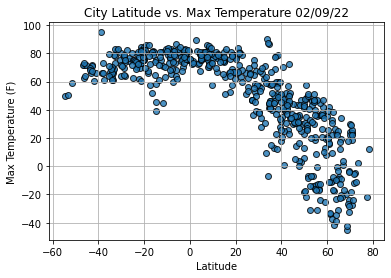

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

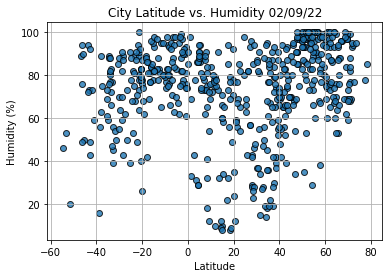

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

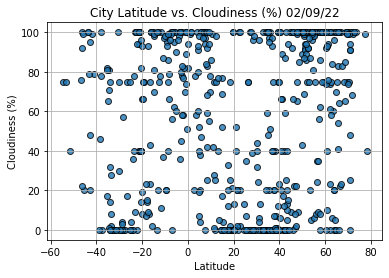

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

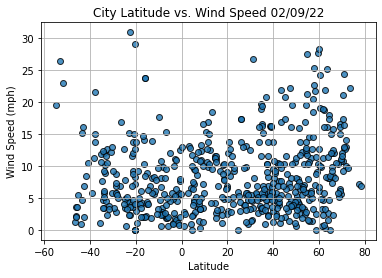

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Kavaratti
Country                        IN
Date          2022-02-09 23:16:22
Lat                       10.5669
Lng                        72.642
Max Temp                    79.12
Humidity                       72
Cloudiness                     99
Wind Speed                  15.35
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
559     True
560     True
561    False
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-02-09 23:20:49,77.4840,-69.3632,-21.77,78,99,7.18
1,At-Bashi,KG,2022-02-09 23:20:49,41.1702,75.8106,0.73,85,89,2.42
6,Shimoda,JP,2022-02-09 23:20:51,34.6667,138.9500,41.36,95,100,18.97
7,Sande,DE,2022-02-09 23:20:52,53.5049,8.0142,46.00,95,100,7.07
8,Bethel,US,2022-02-09 23:17:43,41.3712,-73.4140,38.98,65,17,5.08


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

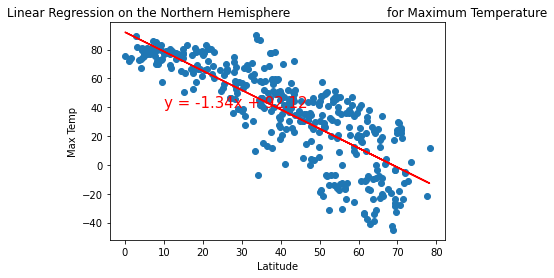

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

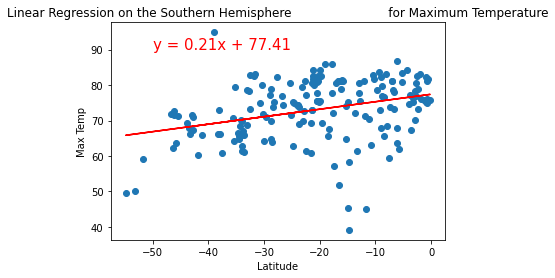

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

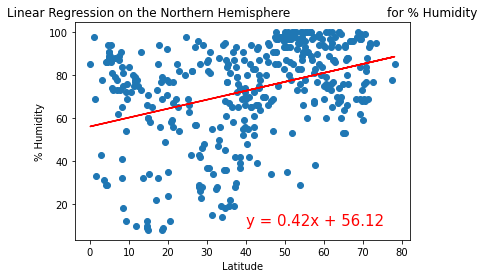

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

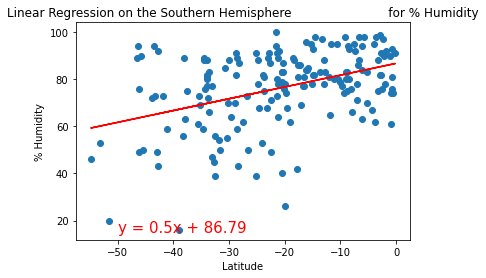

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

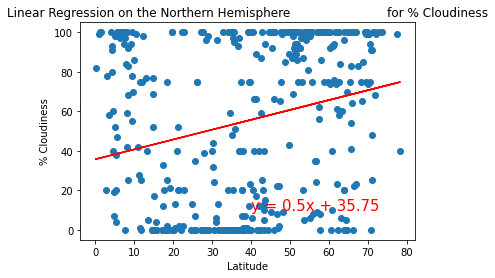

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

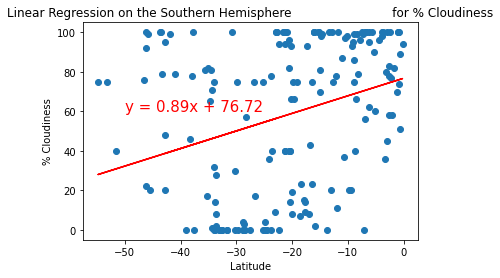

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                         for % Cloudiness', '% Cloudiness',(-50,60))

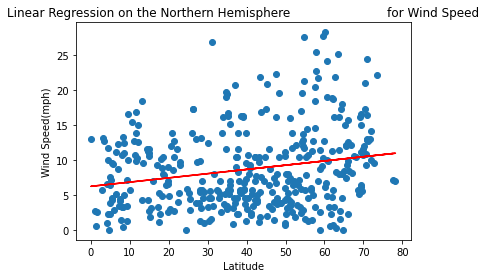

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed(mph)',(40,35))

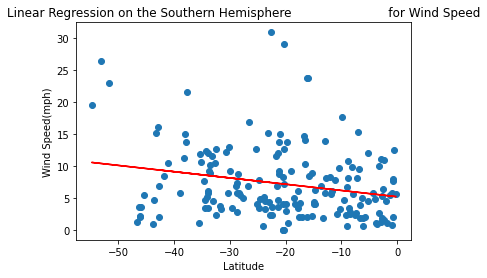

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed(mph)',(-50,35))